In [1]:
from helper import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import scikeras
from scikeras.wrappers import KerasRegressor

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
df = pd.read_csv("Data/data_moods.csv")

In [3]:
col_features = df.columns[6:-3]
col_features

Index(['length', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'liveness', 'valence', 'loudness', 'speechiness', 'tempo'],
      dtype='object')

In [4]:
df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [5]:
x = MinMaxScaler().fit_transform(df[col_features])
x2 = np.array(df[col_features])
y = df['mood']

In [6]:
y.head()

0        Happy
1          Sad
2          Sad
3        Happy
4    Energetic
Name: mood, dtype: object

In [7]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

In [8]:
encoded_y

array([2, 3, 3, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 3, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 3, 3, 1, 2, 1, 2, 1, 3, 0, 0, 0, 1, 1, 0,
       3, 3, 3, 3, 0, 1, 0, 3, 2, 1, 0, 3, 2, 3, 2, 0, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 0, 3, 2, 2, 1, 0, 2, 1, 0, 1, 0, 3, 2, 3, 2, 0, 2, 0, 1,
       3, 1, 2, 1, 0, 2, 0, 0, 1, 0, 3, 3, 1, 0, 0, 2, 1, 0, 1, 3, 3, 2,
       1, 0, 2, 1, 2, 2, 3, 0, 1, 0, 0, 0, 3, 2, 2, 3, 1, 3, 3, 1, 3, 3,
       0, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 1, 3, 2, 2, 2, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 1, 0, 3, 2, 3, 2, 0, 1, 3, 0, 1, 0, 0, 0, 2, 1, 3, 2, 2,
       1, 3, 3, 3, 1, 1, 2, 1, 0, 3, 0, 0, 3, 3, 0, 1, 0, 0, 3, 1, 0, 0,
       0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 3, 0, 1, 1, 2, 2, 3, 3, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 3, 1, 2, 3, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 3, 2, 2, 3, 0, 3, 3, 0, 1, 3, 2, 2, 3, 1, 3, 3, 2, 0, 3, 0,
       0, 3, 0, 0, 1, 1, 0, 0, 3, 0, 3, 1, 3, 3, 3, 0, 3, 2, 0, 2, 3, 3,
       0, 0, 3, 1, 3, 3, 2, 2, 1, 0, 0, 0, 3, 2, 0,

In [9]:
dummy_y = np_utils.to_categorical(encoded_y)
X_train,X_test,Y_train,Y_test = train_test_split(x,encoded_y,test_size=0.3,random_state=15)
target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [10]:
dummy_y

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [11]:
def base_model():
    model = Sequential()
    model.add(Dense(8,input_dim=10,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [12]:
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

C:\Users\crazy\AppData\Local\Temp/ipykernel_7332/2249616358.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)


In [13]:
estimator


In [14]:
kfold = KFold(n_splits=10,shuffle=True)
kfold

KFold(n_splits=10, random_state=None, shuffle=True)

In [15]:
results = cross_val_score(estimator,x,encoded_y,cv=kfold)

c:\users\crazy\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
c:\users\crazy\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
c:\users\crazy\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
c:\users\crazy\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.

In [16]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Baseline: 79.59% (4.84%)


In [17]:
estimator.fit(X_train, Y_train)
y_preds = estimator.predict(X_test)

c:\users\crazy\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


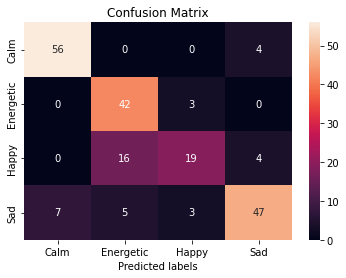

In [18]:
cm = confusion_matrix(Y_test, y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [19]:
accuracy_score(Y_test,y_preds)*100

79.6116504854369

In [20]:
def predict_mood(id_song):
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0))])
    pip.fit(x2,encoded_y)
    preds = get_songs_features(id_song)
    pred_features = np.array(preds[0][6:-2]).reshape(-1,1).T
    results = pip.predict(pred_features)
    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][0]
    artist = preds[0][2]    
    print (name_song, artist, mood)
    return preds

In [34]:
def predict_mood_playlist(id_song):
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0))])
    pip.fit(x2,encoded_y)
    preds = get_songs_features(id_song)
    pred_features = np.array(preds[0][6:-2]).reshape(-1,1).T
    results = pip.predict(pred_features)
    mood = np.array(target['mood'][target['encode']==int(results)])
    p = np.array(preds).reshape(-1,1).T
    print(np.append(pred_features,mood))
    name_song = preds[0][0]
    artist = preds[0][2]    
    print (name_song, artist, mood)
    return preds

In [35]:
p = predict_mood_playlist('1UZOjK1BwmwWU14Erba9CZ')

C:\Users\crazy\AppData\Local\Temp/ipykernel_7332/3674026998.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0))])


[231906.0 0.573 0.0767 0.781 2.64e-05 0.0813 0.343 -6.406 0.0555 139.934
 'Energetic']
Malibu Miley Cyrus ['Energetic']


c:\users\crazy\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


AttributeError: 'list' object has no attribute 'T'

In [55]:
df1 = pd.DataFrame(p[0],columns = p[1])

ValueError: Shape of passed values is (19, 1), indices imply (19, 19)

In [32]:
#https://open.spotify.com/track/69HzZ3ti9DLwb0GdWCGYSo?si=8078a478aeb049ac
#https://open.spotify.com/track/0eTQEpSLPnZhuahEuf1IE1?si=1dcb46794c174f46
#https://open.spotify.com/track/5VBwLOZDyDWInNYIUniuZG?si=d4ffdacebf314d3f
#https://open.spotify.com/track/3bLV6IzouYNz0r6yWbJdB6?si=79e00d402e314f33
#https://open.spotify.com/track/4ndb8qCzSZ1ldJXj8S1d0m?si=65179b5db2da4482
#https://open.spotify.com/track/5I893Y0mB5DDezEbJQSRGs?si=b956e249607f4979
#https://open.spotify.com/track/1bQ4zbP8Fo0qAePTSOfYji?si=a8a01fff9bb8405c
#https://open.spotify.com/track/2neNxCaTPEwuGTvP7QAU1c?si=42575b0ea10e44f0
#https://open.spotify.com/track/5FTEcfaweleTQnrah2nHVq?si=2a5e1b6cf37940c5
#https://open.spotify.com/track/297d7PwfSFHQXCjqqDXQT2?si=af1c989b41014b40
#https://open.spotify.com/track/1UZOjK1BwmwWU14Erba9CZ?si=cd5720bfa2f743bb

In [33]:
track, column = p[0],p[1]

In [61]:
df = pd.DataFrame(track)
t = np.array(['sad'])
s = pd.DataFrame(t)
df = pd.append(s)

AttributeError: module 'pandas' has no attribute 'append'

In [56]:
np.array(df).reshape(-1,1).T

array([['O Father O Satan O Sun!', 'The Satanist', 'Behemoth',
        '5FTEcfaweleTQnrah2nHVq', '2014-02-07', 0, 433440, 0.261,
        0.000382, 0.92, 2.78e-05, 0.157, 0.183, -4.151, 0.064, 84.013, 1,
        4]], dtype=object)

In [38]:
df

,0,mood
0,O Father O Satan O Sun!,sad
1,The Satanist,sad
2,Behemoth,sad
3,5FTEcfaweleTQnrah2nHVq,sad
4,2014-02-07,sad
5,0,sad
6,433440,sad
7,0.261,sad
8,0.000382,sad
9,0.92,sad
